<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/bdm/F4/F4_Assignment_5_Automated_Feature_Engineering_Tools%5BTPOT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Cars Dataset
[Kaggle Link](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data)

Craigslist is the world's largest collection of used vehicles for sale, yet it's very difficult to collect all of them in the same place. I built a scraper for a school project and expanded upon it later to create this dataset which includes every used vehicle entry within the United States on Craigslist.

This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Upload the kaggle Token

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"sitinorafizah","key":"b0e3fb68b882ec542c5a04f27197a87d"}'}

## Data Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()
import re

In [4]:
! pip install kaggle --quiet
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
carlmcbrideellis/llm-7-prompt-training-dataset                   LLM: 7 prompt training dataset                     41MB  2023-11-15 07:32:56           1029         88  1.0              
thedrcat/daigt-v2-train-dataset                                  DAIGT V2 Train Dataset                             29MB  2023-11-16 01:38:36            539         74  1.0              
thedrcat/daigt-proper-train-dataset                              DAIGT Proper Train Dataset                        119MB  2023-11-05 14:03:25           1099        114  1.0              
maso0

In [5]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

craigslist-carstrucks-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip -u "/content/craigslist-carstrucks-data.zip"

Archive:  /content/craigslist-carstrucks-data.zip


In [7]:
df = pd.read_csv("/content/vehicles.csv")

# EDA

## Dataset overview

In [8]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [9]:
df.shape

(426880, 26)

In [10]:
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [11]:
df.tail(3)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [12]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [13]:
df.describe(include='object')

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,426880,426880,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426812,426810,426880,426812
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241899,360911,51,381536
top,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3608,2988,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,7357,231,50614,12


In [14]:
# To observe unique variable for conditioner variables

print(df['cylinders'].unique())
print(df['size'].unique())
print(df['condition'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['drive'].unique())
print(df['type'].unique())
print(df['paint_color'].unique())
print(df['title_status'].unique())

[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
[nan 'other' 'automatic' 'manual']
[nan 'rwd' '4wd' 'fwd']
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']


## Data Type

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [16]:
df['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [17]:
df[['cylinders','unit']] = df['cylinders'].str.split(" ",expand = True)
#df['cylinders'] = df['cylinders'].astype(str)
#df[['cylinders','unit']] = df['cylinders'].str.split(" ",expand = True)

# Drop unit variable
df.drop(['unit'],inplace=True,axis=1)
df['cylinders'].unique()



array([nan, '8', '6', '4', '5', 'other', '3', '10', '12'], dtype=object)

In [18]:
df['cylinders'].replace(to_replace=['other'],value=[np.nan],inplace=True)
df['cylinders'].unique()

array([nan, '8', '6', '4', '5', '3', '10', '12'], dtype=object)

In [19]:
df['id']=df['id'].astype(object)
df['cylinders']=df['cylinders'].astype(float)

In [ ]:
#df['posting_date']= pd.to_datetime(df['posting_date'])

In [21]:
df['year']= pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  object 
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     247904 non-null  float64
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## Missing Value

In [23]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       178976
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [24]:
## Drop Empty County Column.
df.drop(['county'],inplace=True,axis=1)

In [25]:
# Fill OBJECT empty cell with "Not Provided"
df['manufacturer'].fillna("Not Provided",inplace=True)
df['model'].fillna("Not Provided",inplace=True)
df['condition'].fillna("Not Provided",inplace=True)
df['fuel'].fillna("Not Provided",inplace=True)
df['drive'].fillna("Not Provided",inplace=True)
df['title_status'].fillna("Not Provided",inplace=True)
df['transmission'].fillna("Not Provided",inplace=True)
df['VIN'].fillna("Not Provided",inplace=True)
df['size'].fillna("Not Provided",inplace=True)
df['type'].fillna("Not Provided",inplace=True)
df['paint_color'].fillna("Not Provided",inplace=True)
df['image_url'].fillna("Not Provided",inplace=True)
df['description'].fillna("Not Available",inplace=True)

# No action will be do on numerical variable

In [26]:
df['posting_date'].fillna(method="ffill",inplace=True)
df['posting_date'].fillna(method="bfill",inplace=True)
df['year'].fillna(method="ffill",inplace=True)
df['year'].fillna(method="bfill",inplace=True)

In [27]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders       178976
fuel                 0
odometer          4400
title_status         0
transmission         0
VIN                  0
drive                0
size                 0
type                 0
paint_color          0
image_url            0
description          0
state                0
lat               6549
long              6549
posting_date         0
dtype: int64

## Duplicate Value

In [28]:
df.duplicated().sum()

0

In [29]:
df.drop_duplicates()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,2014.0,Not Provided,Not Provided,Not Provided,NaN,...,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Available,az,NaN,NaN,2021-05-04T12:31:18-0500
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,2014.0,Not Provided,Not Provided,Not Provided,NaN,...,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Available,ar,NaN,NaN,2021-05-04T12:31:18-0500
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,2014.0,Not Provided,Not Provided,Not Provided,NaN,...,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Available,fl,NaN,NaN,2021-05-04T12:31:18-0500
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,2014.0,Not Provided,Not Provided,Not Provided,NaN,...,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Available,ma,NaN,NaN,2021-05-04T12:31:18-0500
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,2014.0,Not Provided,Not Provided,Not Provided,NaN,...,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Available,nc,NaN,NaN,2021-05-04T12:31:18-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6.0,...,fwd,Not Provided,sedan,Not Provided,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,fwd,Not Provided,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,Not Provided,Not Provided,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6.0,...,fwd,Not Provided,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [30]:
df.duplicated().all()

False

## Univariable Analysis

1. 'id'
2. 'url' --> drop
3. 'region'
4. 'region_url' --> drop
5. 'price'
6. 'year'
7. 'manufacturer'
8. 'model'
9. 'condition'
10. 'cylinders'
11. 'fuel'
12. 'odometer'
13. 'title_status'
14. 'transmission'
15. 'VIN' --> drop
16. 'drive'
17. 'size'
18. 'type'
19. 'paint_color'
20. 'image_url' --> drop
21. 'description' --> drop
22. 'state'
23. 'lat', 'long' --> drop
24. 'posting_date'

### 1. id

In [31]:
df['id'].describe()

count         426880
unique        426880
top       7222695916
freq               1
Name: id, dtype: int64

In [32]:
id_uniqueness = (df.id.count()/df.id.nunique()*100)
id_uniqueness

100.0

In [33]:
id_count = df['id'].value_counts().rename_axis('url').reset_index(name='count')
id_count

,url,count
0,7222695916,1
1,7313139418,1
2,7313423023,1
3,7313423324,1
4,7313424533,1
...,...,...
426875,7314655506,1
426876,7314655833,1
426877,7314657468,1
426878,7314659947,1


100% of uniqueness = No duplication on id where proved it is suitable fit as key variable.

### 2. url

In [34]:
df['url'].describe()

count                                                426880
unique                                               426880
top       https://prescott.craigslist.org/cto/d/prescott...
freq                                                      1
Name: url, dtype: object

In [35]:
url_uniqueness = (df.url.count()/df.url.nunique()*100)
url_uniqueness

100.0

In [36]:
url_count = df['url'].value_counts().rename_axis('url').reset_index(name='count')
url_count

,url,count
0,https://prescott.craigslist.org/cto/d/prescott...,1
1,https://nh.craigslist.org/cto/d/troy-1998-dodg...,1
2,https://nh.craigslist.org/ctd/d/north-hampton-...,1
3,https://nh.craigslist.org/ctd/d/derry-2008-chr...,1
4,https://nh.craigslist.org/ctd/d/derry-2002-toy...,1
...,...,...
426875,https://chicago.craigslist.org/chc/cto/d/pleas...,1
426876,https://chicago.craigslist.org/wcl/cto/d/saint...,1
426877,https://chicago.craigslist.org/nwc/cto/d/north...,1
426878,https://chicago.craigslist.org/sox/cto/d/chica...,1


As shown above each id having unique url link.

Url link is dropped due to duplication with id.

In [37]:
df.drop(['url'],inplace=True,axis=1)

### 3. region

In [38]:
df['region'].describe()

count       426880
unique         404
top       columbus
freq          3608
Name: region, dtype: object

In [39]:
region_count=df['region'].value_counts().rename_axis('region').reset_index(name='count')
region_count

,region,count
0,columbus,3608
1,jacksonville,3562
2,spokane / coeur d'alene,2988
3,eugene,2985
4,fresno / madera,2983
...,...,...
399,meridian,28
400,southwest MS,14
401,kansas city,11
402,"fort smith, AR",9


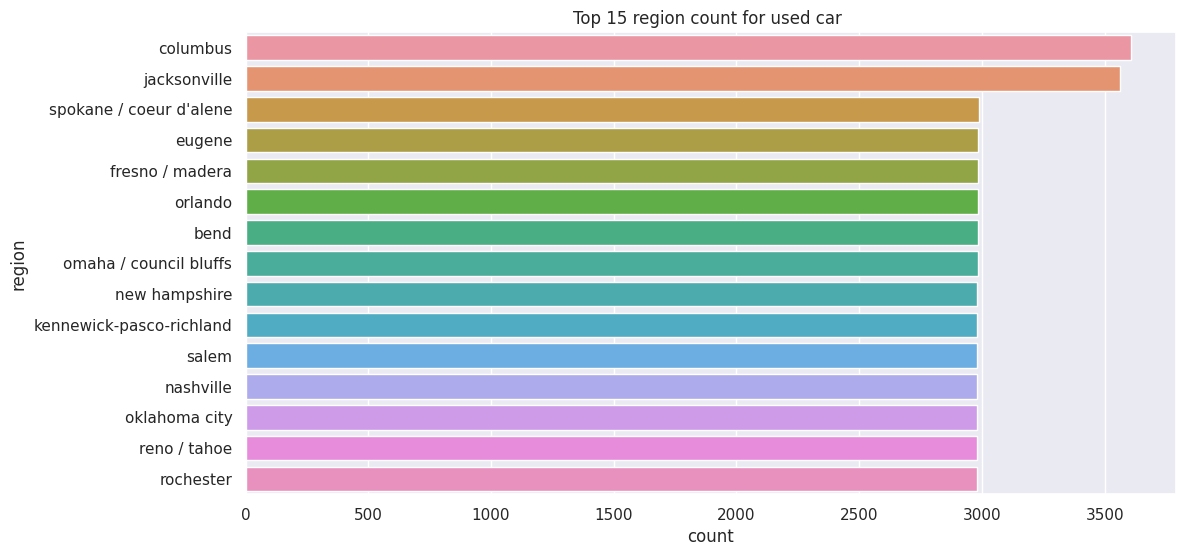

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='region',data=region_count.nlargest(15, 'count')).set(title='Top 15 region count for used car ')
plt.show()

### 4. region url

In [41]:
df['region_url'].describe()

count                             426880
unique                               413
top       https://spokane.craigslist.org
freq                                2988
Name: region_url, dtype: object

In [42]:
ru_count=pd.DataFrame(df.groupby('region_url',as_index=False)['region'].value_counts().sort_values(ascending=False,by='count'))
ru_count

,region_url,region,count
348,https://spokane.craigslist.org,spokane / coeur d'alene,2988
107,https://eugene.craigslist.org,eugene,2985
271,https://orlando.craigslist.org,orlando,2983
126,https://fresno.craigslist.org,fresno / madera,2983
266,https://omaha.craigslist.org,omaha / council bluffs,2982
...,...,...,...
223,https://meridian.craigslist.org,meridian,28
243,https://natchez.craigslist.org,southwest MS,14
173,https://kansascity.craigslist.org,kansas city,11
122,https://fortsmith.craigslist.org,"fort smith, AR",9


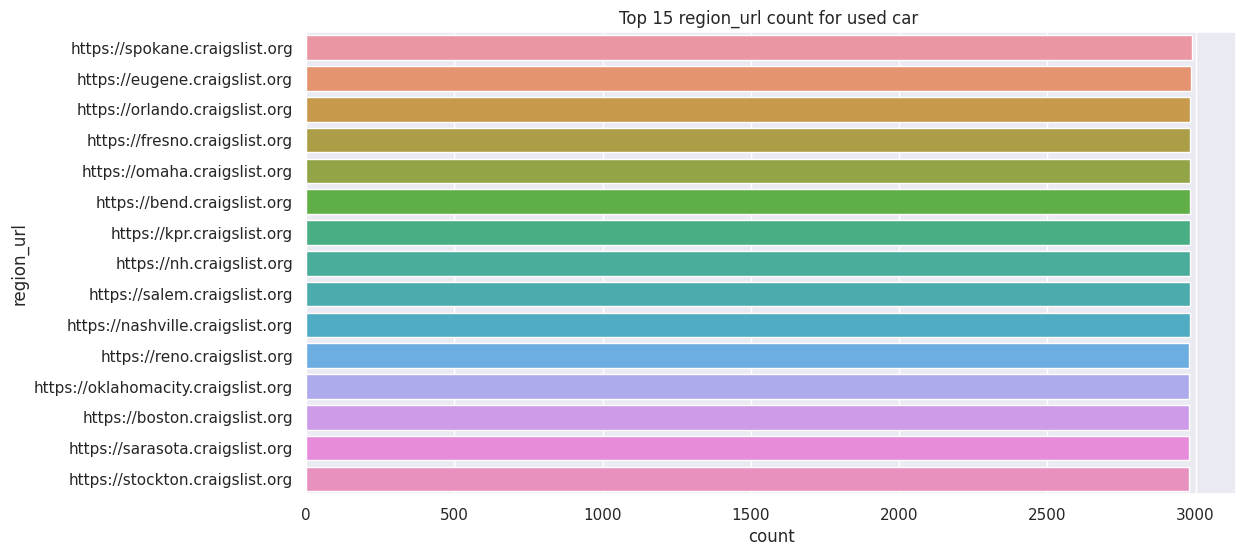

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='region_url',data=ru_count.nlargest(15, 'count')).set(title='Top 15 region_url count for used car ')
plt.show()

The region url is similar to region where the url can be replace by region and meaningless. Hence, region url can be dropped.

In [44]:
df.drop(['region_url'],inplace=True,axis=1)

### 5. price

In [45]:
df['price'].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

In [46]:
df['price'].min()

0

In [47]:
df['price'].max()

3736928711

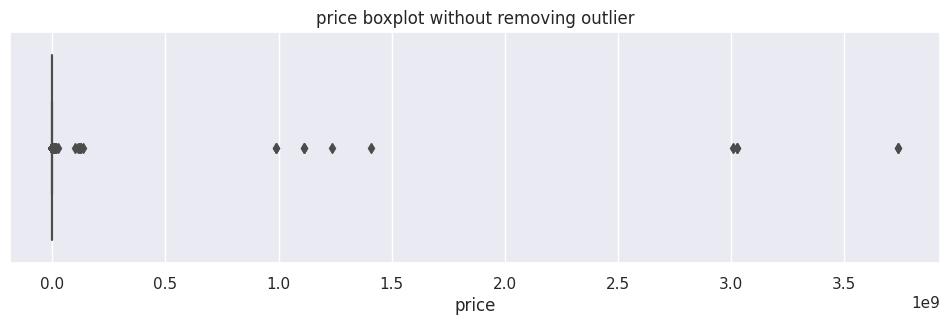

In [48]:
plt.figure(figsize=(12,3))
sns.boxplot(x='price',data=df).set(title ='price boxplot without removing outlier')
plt.show()

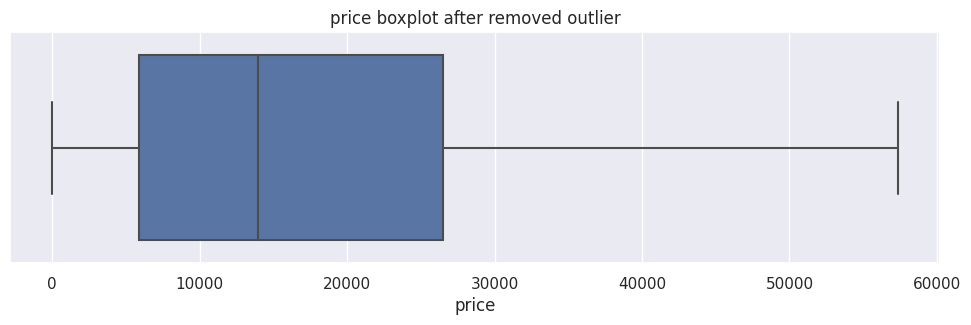

In [49]:
plt.figure(figsize=(12,3))
sns.boxplot(x='price',data=df,showfliers=False).set(title ='price boxplot after removed outlier')
plt.show()
plt.show()

In [50]:
price_count=df['price'].value_counts().rename_axis('price').reset_index(name='count')
price_count

,price,count
0,0,32895
1,6995,3169
2,7995,3129
3,9995,2867
4,8995,2837
...,...,...
15650,21298,1
15651,49217,1
15652,63195,1
15653,19709,1


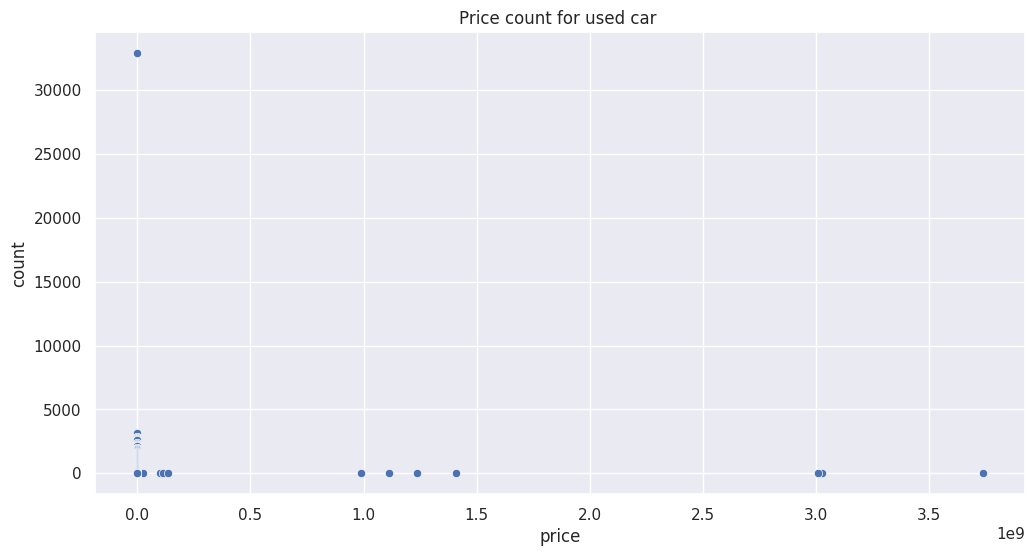

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='count',data=price_count.sort_values(by='count',ascending=False)).set(title='Price count for used car ')
plt.show()

Based on finding on the price range, some outliers on price was observed.
Some preprocessing of price need to be done to remove outlier.

In [52]:
#q_low
ypbot = np.percentile(df.price, 1)
#q_high
yptop = np.percentile(df.price, 99)
ypad = 0.2*(yptop - ypbot)
ymin = ypbot - ypad
ymax = yptop + ypad

#ymin will be set as 0 due to price is a ratio value which minumum is 0 .
(0,ymax)

# df_filtered
df = df[(df["price"] < ymax) & (df["price"] > 0)]

#Another method
# Q1 = df["price"].quantile(0.25)
# Q3  = df["price"].quantile(0.75)
# IQR= Q3-Q1
# q_low=Q1-1.5*IQR
# q_high=Q3+1.5*IQR

# (q_low,q_high)

# # df_filtered
# # df = df[(df["price"] < q_hi) & (df["price"] > q_low)]

In [53]:
price_count=df['price'].value_counts().rename_axis('price').reset_index(name='count')
price_count

,price,count
0,6995,3169
1,7995,3129
2,9995,2867
3,8995,2837
4,4500,2778
...,...,...
15228,9301,1
15229,23397,1
15230,35693,1
15231,48300,1


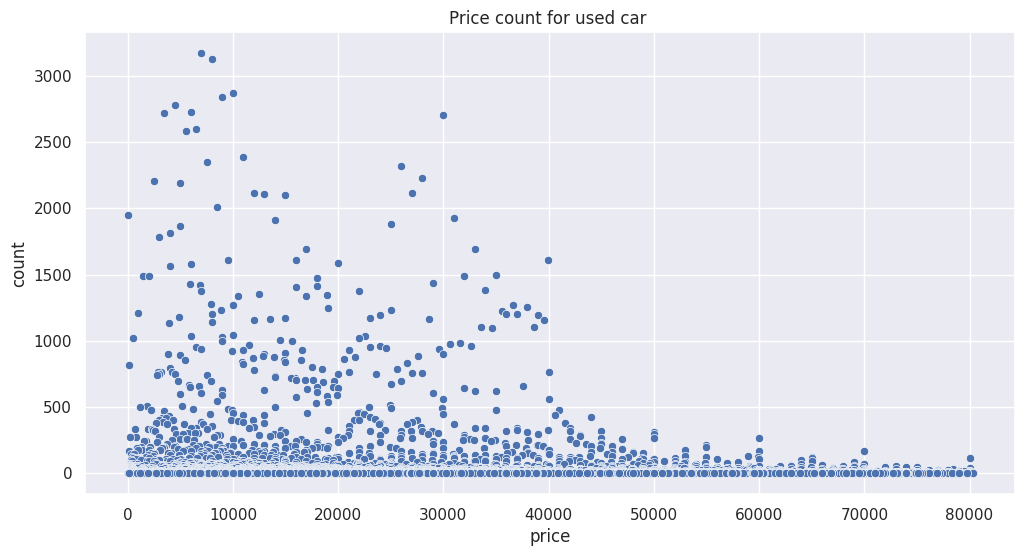

In [54]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='count',data=price_count.sort_values(by='count',ascending=False)).set(title='Price count for used car ')
plt.show()

### 6. year

In [55]:
df['year'].describe()

count    392359.000000
mean       2011.003023
std           9.591335
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

In [56]:
df['year'].min()

1900.0

In [57]:
df['year'].max()

2022.0

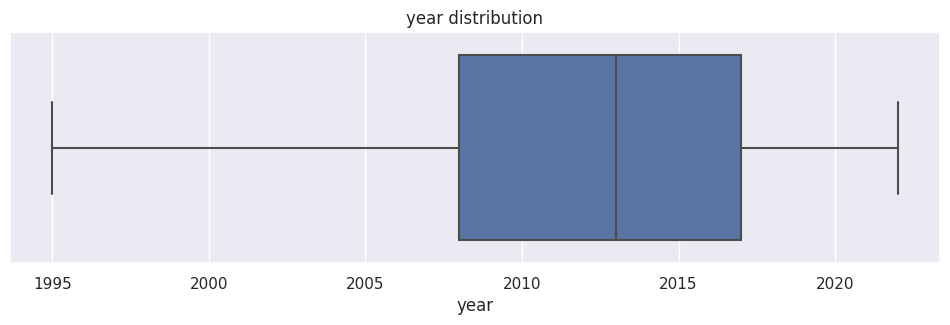

In [58]:
plt.figure(figsize=(12,3))
sns.boxplot(x='year',data=df,showfliers=False).set(title='year distribution')
plt.show()

In [59]:
year_count=df['year'].value_counts().rename_axis('year').reset_index(name='count')
year_count

,year,count
0,2018.0,32562
1,2017.0,32560
2,2013.0,28233
3,2015.0,28041
4,2016.0,27421
...,...,...
107,1905.0,1
108,1943.0,1
109,1913.0,1
110,1918.0,1


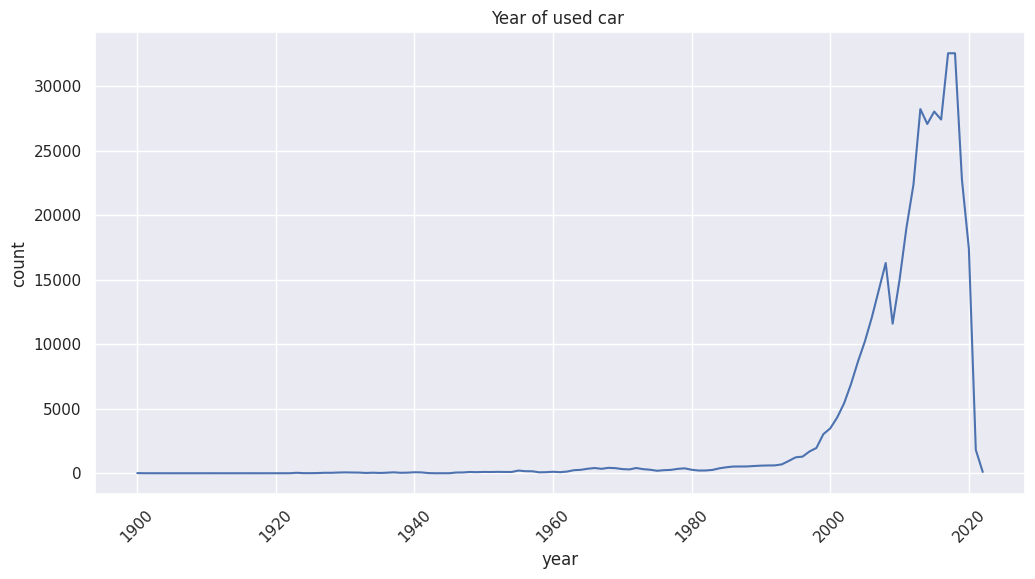

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count',data=year_count).set(title='Year of used car ')
plt.xticks(rotation=45)
plt.show()

### 7. manufacturer

In [61]:
df['manufacturer'].describe()

count     392359
unique        43
top         ford
freq       64607
Name: manufacturer, dtype: object

In [62]:
df['manufacturer'].unique()

array(['Not Provided', 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep',
       'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus',
       'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti',
       'lincoln', 'alfa-romeo', 'subaru', 'acura', 'hyundai',
       'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche',
       'kia', 'rover', 'mini', 'pontiac', 'fiat', 'tesla', 'saturn',
       'mercury', 'harley-davidson', 'datsun', 'aston-martin',
       'land rover', 'ferrari', 'morgan'], dtype=object)

In [63]:
manu_count=df['manufacturer'].value_counts().rename_axis('manufacturer').reset_index(name='count')
manu_count

,manufacturer,count
0,ford,64607
1,chevrolet,50372
2,toyota,31591
3,honda,19866
4,jeep,17430
5,nissan,17382
6,ram,16419
7,Not Provided,15864
8,gmc,15306
9,bmw,13710


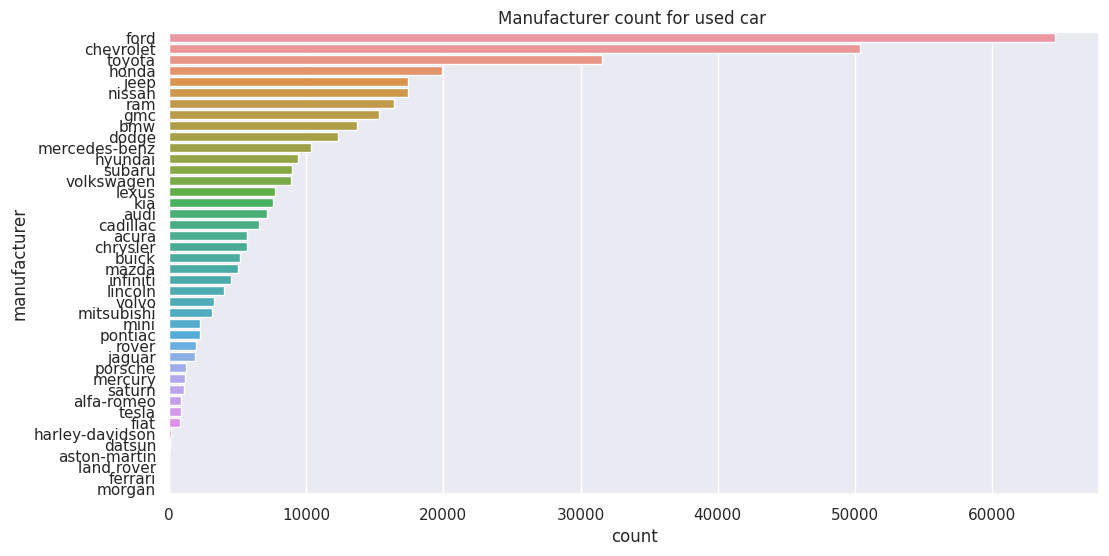

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='manufacturer',data=manu_count.query('manufacturer!="Not Provided"')).set(title='Manufacturer count for used car ')
plt.show()

### 8. model

In [65]:
df['model'].describe()

count     392359
unique     28010
top        f-150
freq        7112
Name: model, dtype: object

In [66]:
model_count=df['model'].value_counts().rename_axis('model').reset_index(name='count')
model_count

,model,count
0,f-150,7112
1,silverado 1500,4546
2,Not Provided,4514
3,1500,3796
4,camry,2827
...,...,...
28005,ln 8000,1
28006,// vmi // ♿,1
28007,mustang fastback 2+2,1
28008,Tiger mag,1


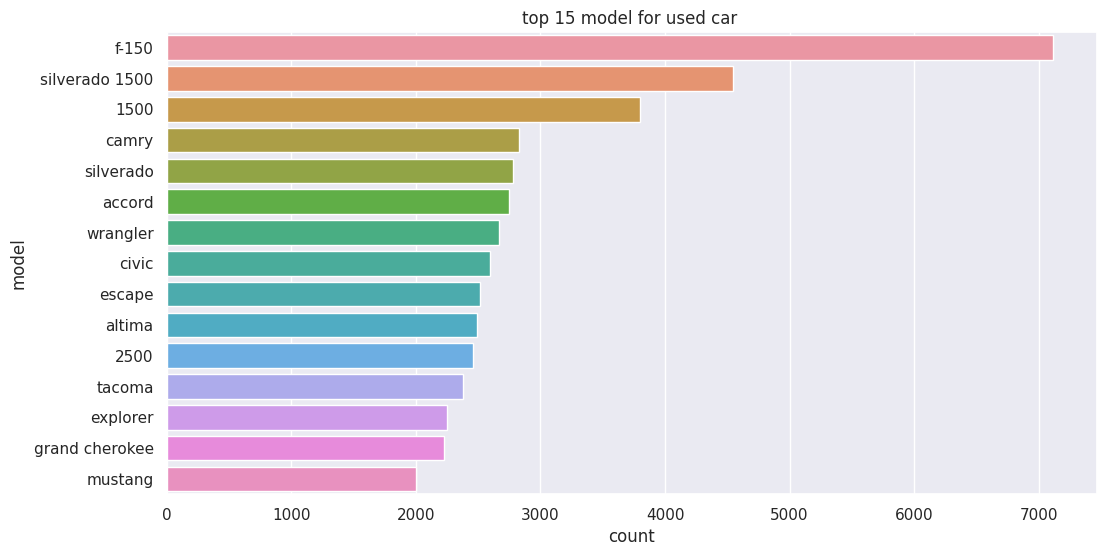

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='model',data=model_count.query('model!="Not Provided"').nlargest(15,'count')).set(title='top 15 model for used car ')
plt.show()

### 9. condition

In [68]:
df['condition'].describe()

count           392359
unique               7
top       Not Provided
freq            150368
Name: condition, dtype: object

In [69]:
df['condition'].unique()

array(['Not Provided', 'good', 'excellent', 'fair', 'like new', 'new',
       'salvage'], dtype=object)

In [70]:
con_count=df['condition'].value_counts().rename_axis('condition').reset_index(name='count')
con_count

,condition,count
0,Not Provided,150368
1,good,119083
2,excellent,94621
3,like new,19892
4,fair,6718
5,new,1082
6,salvage,595


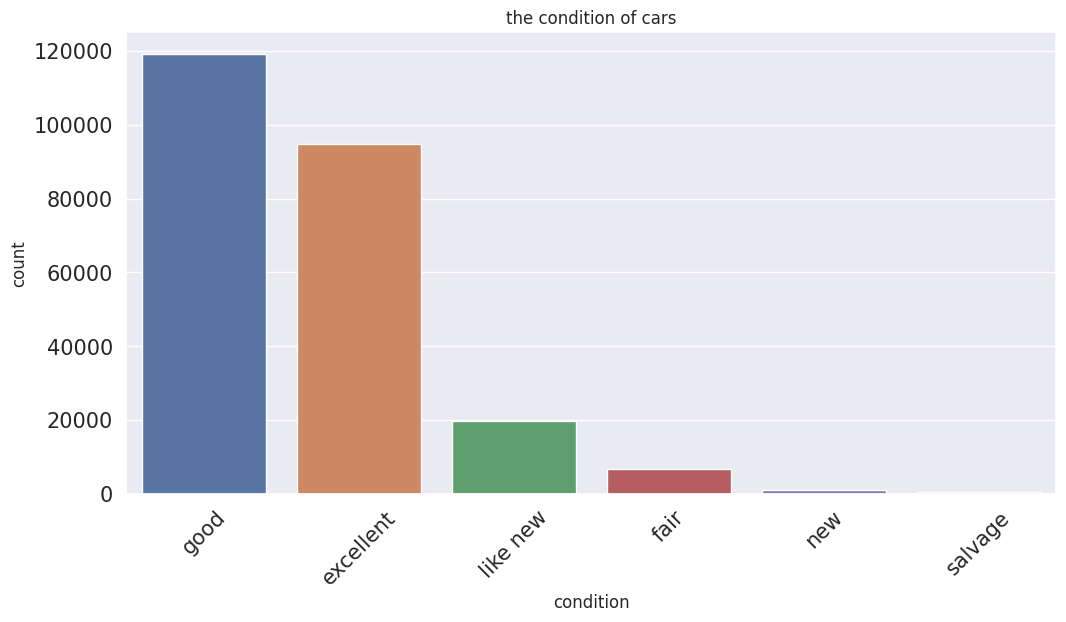

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x='condition',y='count',data=con_count.query('condition!="Not Provided"')).set(title='the condition of cars')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15);

### 10. cylinders

In [72]:
df['cylinders'].describe()

count    231549.000000
mean          5.952481
std           1.596516
min           3.000000
25%           4.000000
50%           6.000000
75%           8.000000
max          12.000000
Name: cylinders, dtype: float64

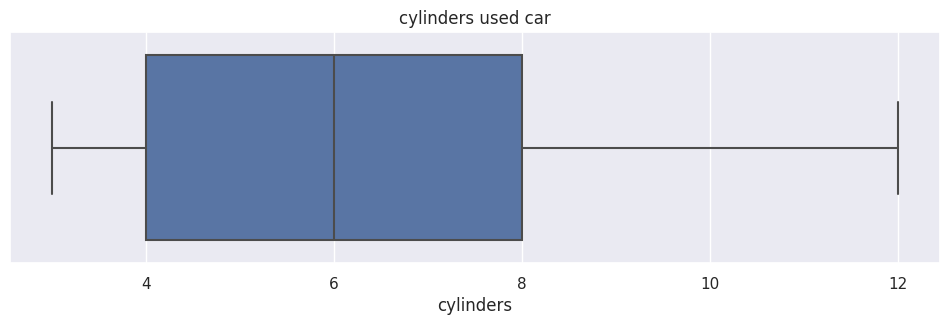

In [73]:
plt.figure(figsize=(12,3))
sns.boxplot(x='cylinders',data=df).set(title='cylinders used car')
plt.show()

In [74]:
cyc_count=df['cylinders'].value_counts().rename_axis('cylinders').reset_index(name='count')
cyc_count

,cylinders,count
0,6.0,88719
1,4.0,72985
2,8.0,66063
3,5.0,1668
4,10.0,1338
5,3.0,611
6,12.0,165


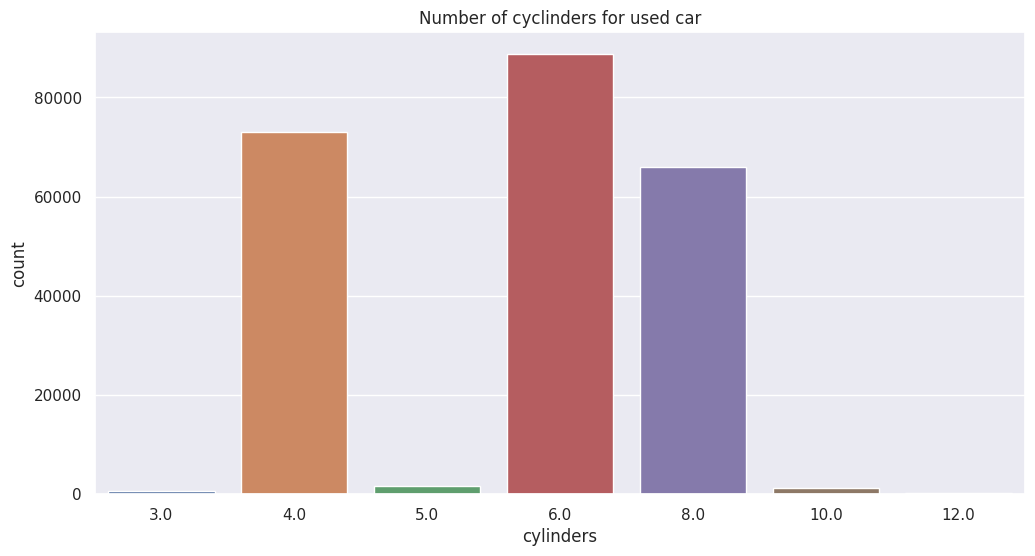

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(x='cylinders',y='count',data=cyc_count).set(title='Number of cyclinders for used car')
plt.show()

### 11. fuel

In [76]:
df['fuel'].describe()

count     392359
unique         6
top          gas
freq      329490
Name: fuel, dtype: object

In [77]:
df['fuel'].unique()

array(['Not Provided', 'gas', 'other', 'diesel', 'hybrid', 'electric'],
      dtype=object)

In [78]:
fuel_count=df['fuel'].value_counts().rename_axis('fuel').reset_index(name='count')
fuel_count

,fuel,count
0,gas,329490
1,other,27879
2,diesel,25905
3,hybrid,4884
4,Not Provided,2588
5,electric,1613


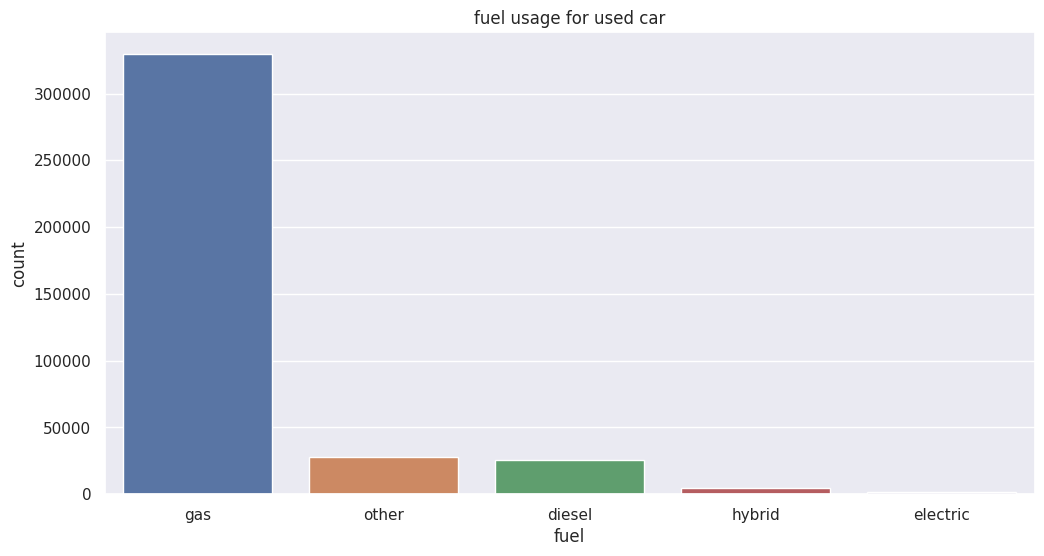

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(x='fuel',y='count',data=fuel_count.query('fuel!="Not Provided"')).set(title='fuel usage for used car')
plt.show()

### 12. odometer

In [80]:
df['odometer'].describe()

count    3.900910e+05
mean     9.894297e+04
std      2.055280e+05
min      0.000000e+00
25%      3.842600e+04
50%      8.729100e+04
75%      1.356000e+05
max      1.000000e+07
Name: odometer, dtype: float64

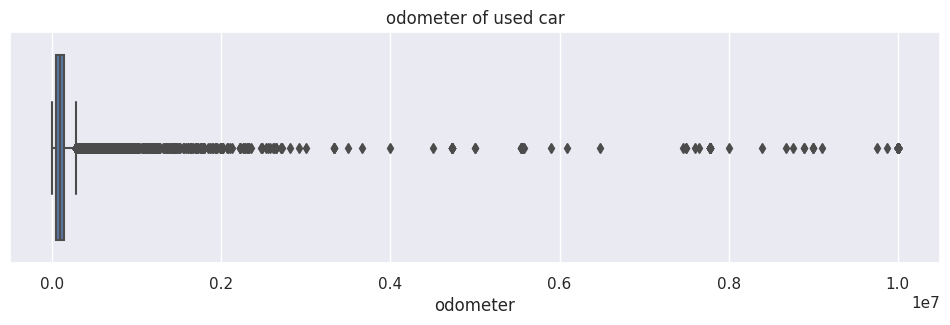

In [81]:
plt.figure(figsize=(12,3))
sns.boxplot(x='odometer',data=df).set(title='odometer of used car')
plt.show()

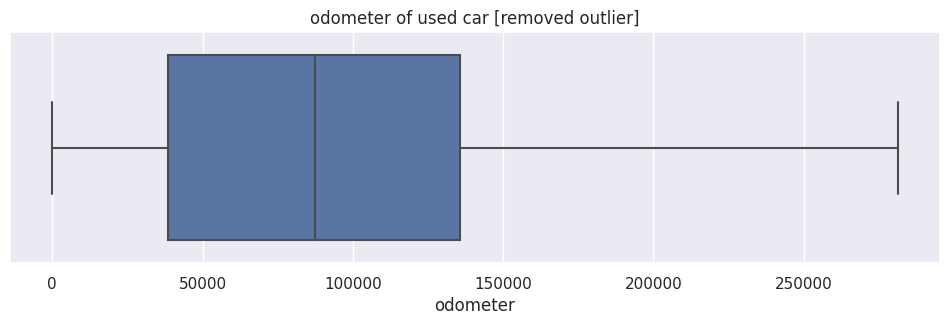

In [82]:
plt.figure(figsize=(12,3))
sns.boxplot(x='odometer',data=df,showfliers=False).set(title='odometer of used car [removed outlier]')
plt.show()

In [83]:
odo_count=df['odometer'].value_counts().rename_axis('odometer').reset_index(name="count")
odo_count

,odometer,count
0,100000.0,2107
1,1.0,1888
2,200000.0,1674
3,150000.0,1555
4,140000.0,1220
...,...,...
98561,83311.0,1
98562,169009.0,1
98563,50815.0,1
98564,89772.0,1


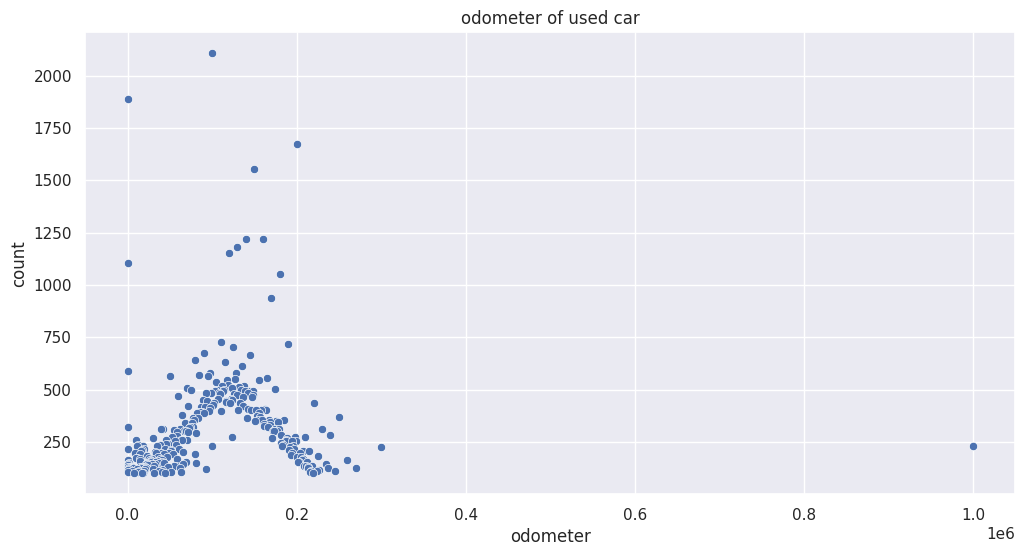

In [84]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='odometer',y='count',data=odo_count.query('count >100')).set(title='odometer of used car')
plt.show()

Based on obeservation, scaling is required on odometer to show process of normalizing the range of features in a dataset.

### 13. title_status

clean           371321
Not Provided      7697
rebuilt           7133
salvage           3825
lien              1410
missing            785
parts only         188
Name: title_status, dtype: int64


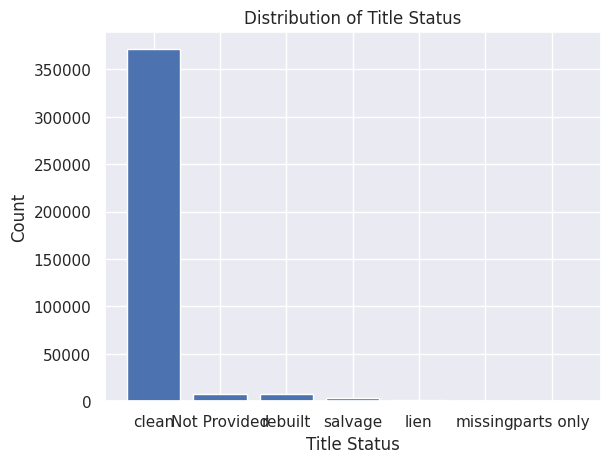

In [85]:
# Create a frequency table for the title_status variable
title_status_freq = df['title_status'].value_counts()
print(title_status_freq)

# Create a bar chart for the title_status variable
plt.bar(title_status_freq.index, title_status_freq.values)
plt.xlabel('Title Status')
plt.ylabel('Count')
plt.title('Distribution of Title Status')
plt.show()

### 14. transmission

automatic       305466
other            61419
manual           23660
Not Provided      1814
Name: transmission, dtype: int64


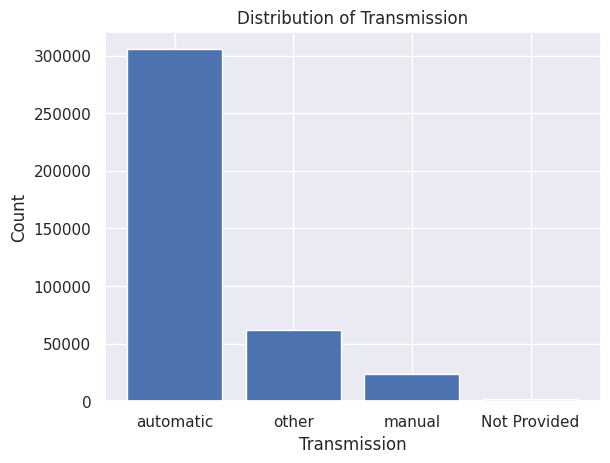

In [88]:
# Create a frequency table for the transmission variable
transmission_freq = df['transmission'].value_counts()
print(transmission_freq)

# Create a bar chart for the transmission variable
plt.bar(transmission_freq.index, transmission_freq.values)
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Distribution of Transmission')
plt.show()

### 15. VIN

In [89]:
df.drop(['VIN'],inplace=True,axis=1)

### 16. drive

4wd             120023
Not Provided    119789
fwd              97538
rwd              55009
Name: drive, dtype: int64


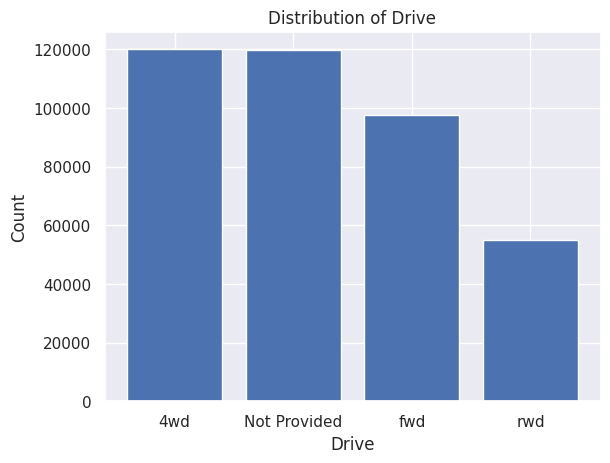

In [90]:
# Create a frequency table for the drive variable
drive_freq = df['drive'].value_counts()
print(drive_freq)

# Create a bar chart for the drive variable
plt.bar(drive_freq.index, drive_freq.values)
plt.xlabel('Drive')
plt.ylabel('Count')
plt.title('Distribution of Drive')
plt.show()

### 17. size

Not Provided    281742
full-size        58301
mid-size         31863
compact          17590
sub-compact       2863
Name: size, dtype: int64


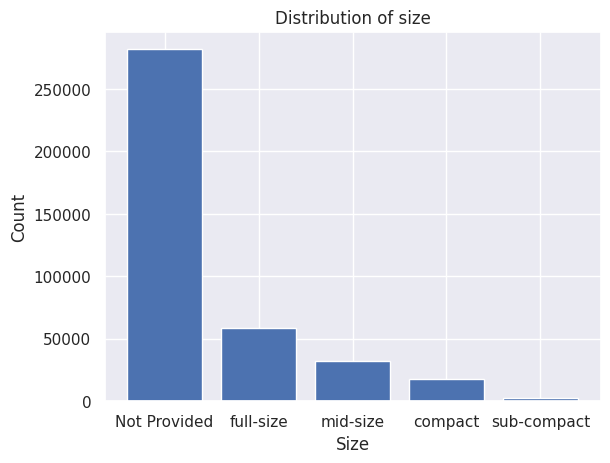

In [91]:
# Create a frequency table for the size variable
size_freq = df['size'].value_counts()
print(size_freq)

# Create a bar chart for the size variable
plt.bar(size_freq.index, size_freq.values)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Distribution of size')
plt.show()

### 18. type

Not Provided    85536
sedan           80234
SUV             70459
pickup          41209
truck           30412
other           19709
coupe           17922
hatchback       15913
wagon           10050
van              7962
convertible      7312
mini-van         4552
offroad           591
bus               498
Name: type, dtype: int64


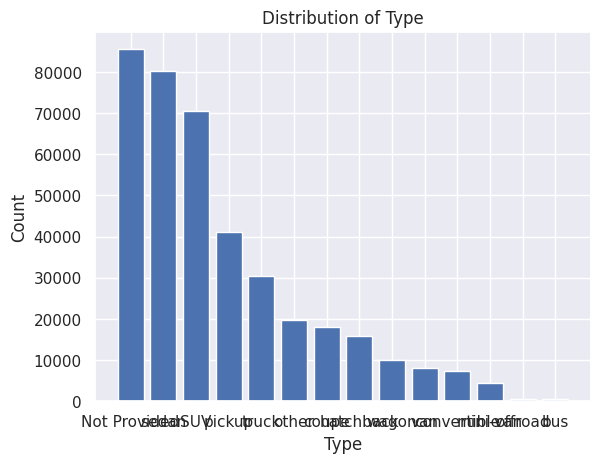

In [92]:
# Create a frequency table for the type variable
type_freq = df['type'].value_counts()
print(type_freq)

# Create a bar chart for the type variable
plt.bar(type_freq.index, type_freq.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Type')
plt.show()

### 19. paint_color

Not Provided    116543
white            72589
black            58203
silver           40023
blue             29363
red              28738
grey             22754
green             7050
custom            6391
brown             6177
yellow            2014
orange            1843
purple             671
Name: paint_color, dtype: int64


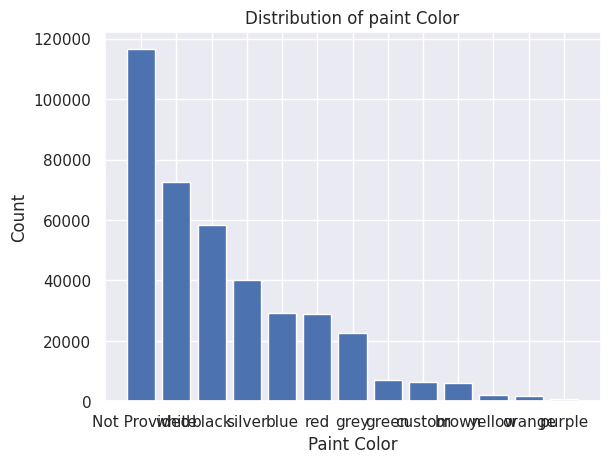

In [93]:
# Create a frequency table for the paint_color variable
paint_color_freq = df['paint_color'].value_counts()
print(paint_color_freq)

# Create a bar chart for the paint_color variable
plt.bar(paint_color_freq.index, paint_color_freq.values)
plt.xlabel('Paint Color')
plt.ylabel('Count')
plt.title('Distribution of paint Color')
plt.show()

### 20. image_url

In [94]:
df.drop(['image_url'],inplace=True,axis=1)

### 21. description

In [95]:
df.drop(['description'],inplace=True,axis=1)

### 22. state

In [96]:
df['state']=df['state'].str.upper()

In [97]:
df['state'].unique()

array(['AZ', 'AR', 'FL', 'MA', 'NC', 'NY', 'OR', 'PA', 'WA', 'WI', 'AL',
       'AK', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NH', 'ND', 'OH', 'OK', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WV', 'WY'], dtype=object)

In [98]:
df['state'].nunique()

51

### 23. 'lat', 'long'

feature engineering with create a new column for lat and long.
hence, these 2 columns will be dropped.

In [99]:
df.drop(['lat'],inplace=True,axis=1)

In [100]:
df.drop(['long'],inplace=True,axis=1)

### 24. posting_date

In [102]:
df['posting_date'].describe()

count                       392359
unique                      351411
top       2021-05-04T12:31:18-0500
freq                            23
Name: posting_date, dtype: object

## EDA Question

### Q1 : What is the price and fuel distribution between different year,cylinders and odometer?

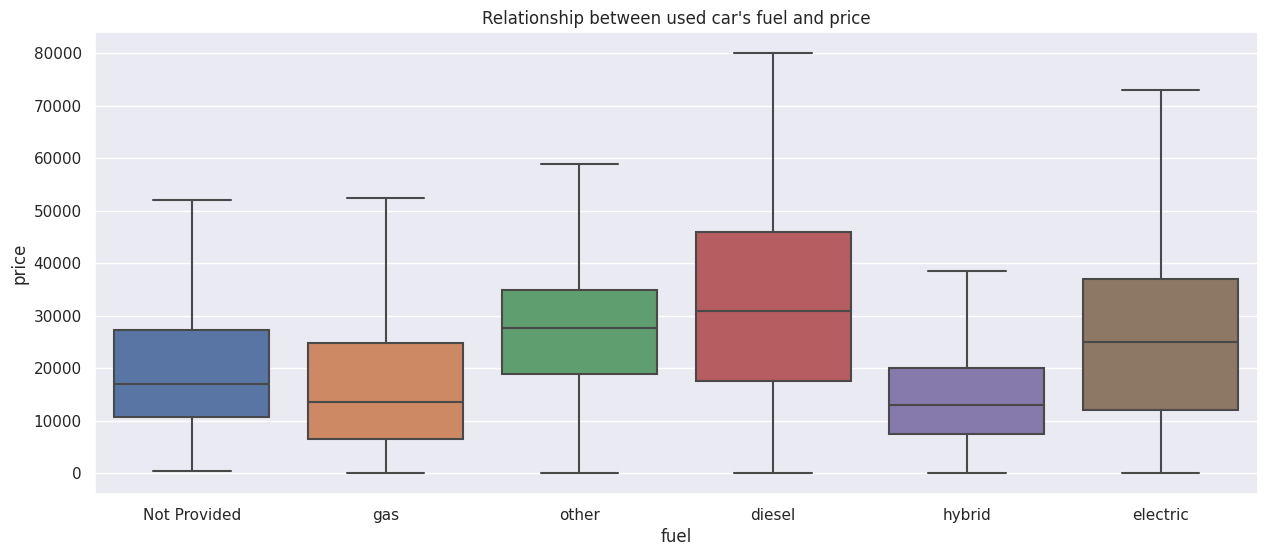

In [103]:
plt.figure(figsize=(15,6))
sns.boxplot(x='fuel',y='price',data=df,showfliers=False).set(title="Relationship between used car's fuel and price")
plt.show()

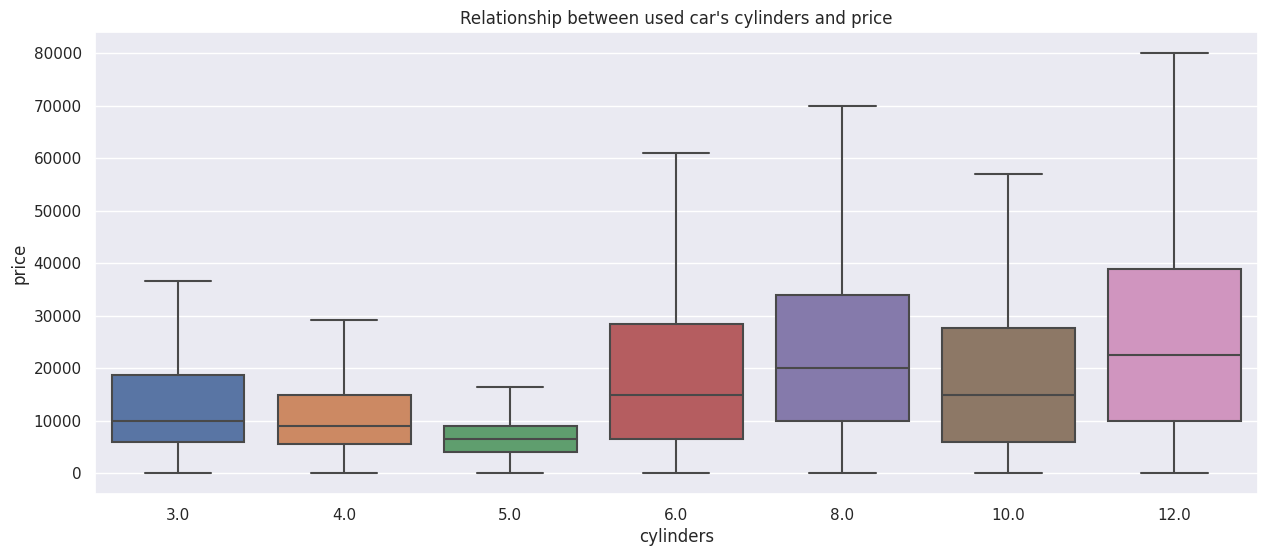

In [104]:
plt.figure(figsize=(15,6))
sns.boxplot(x='cylinders',y='price',data=df,showfliers=False).set(title="Relationship between used car's cylinders and price")
plt.show()

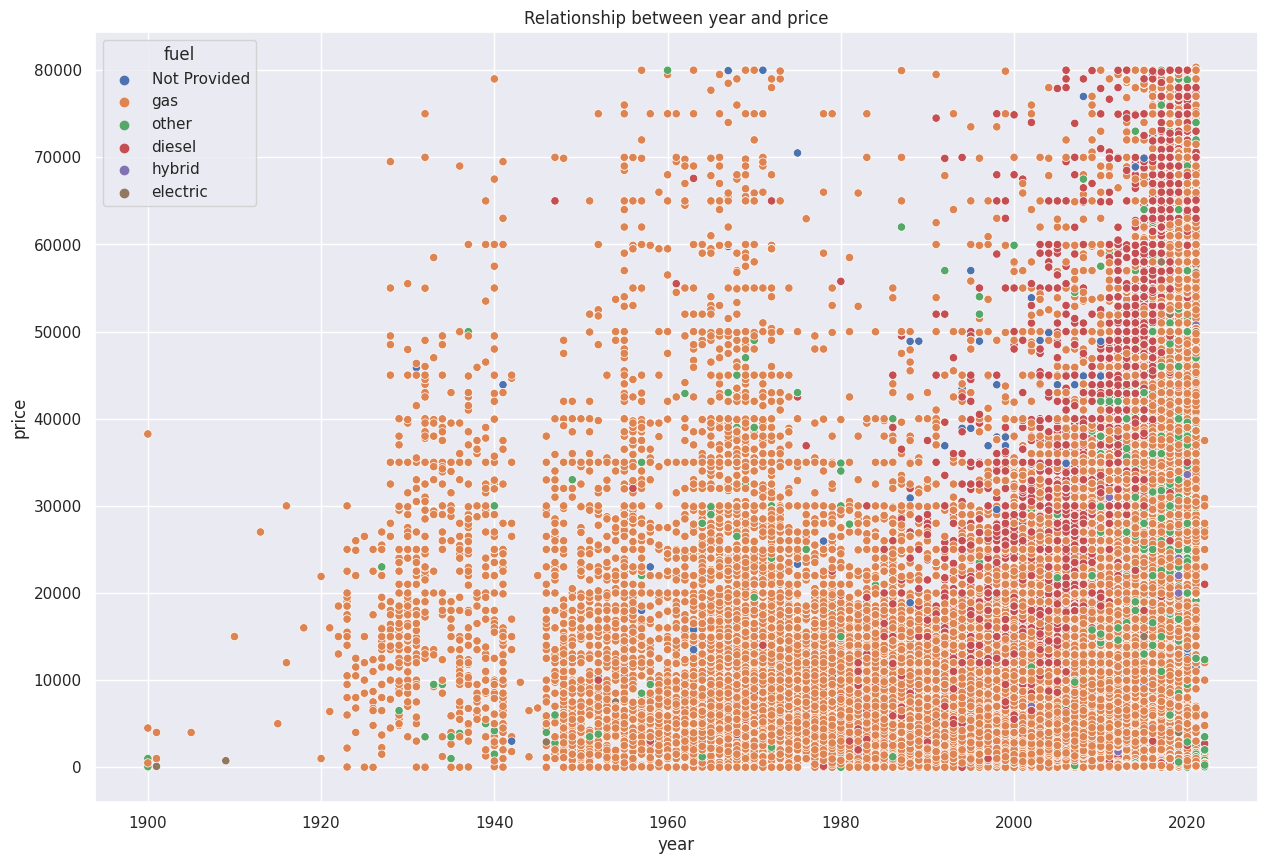

In [105]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='year',y='price',hue='fuel',data=df).set(title='Relationship between year and price')
plt.show()

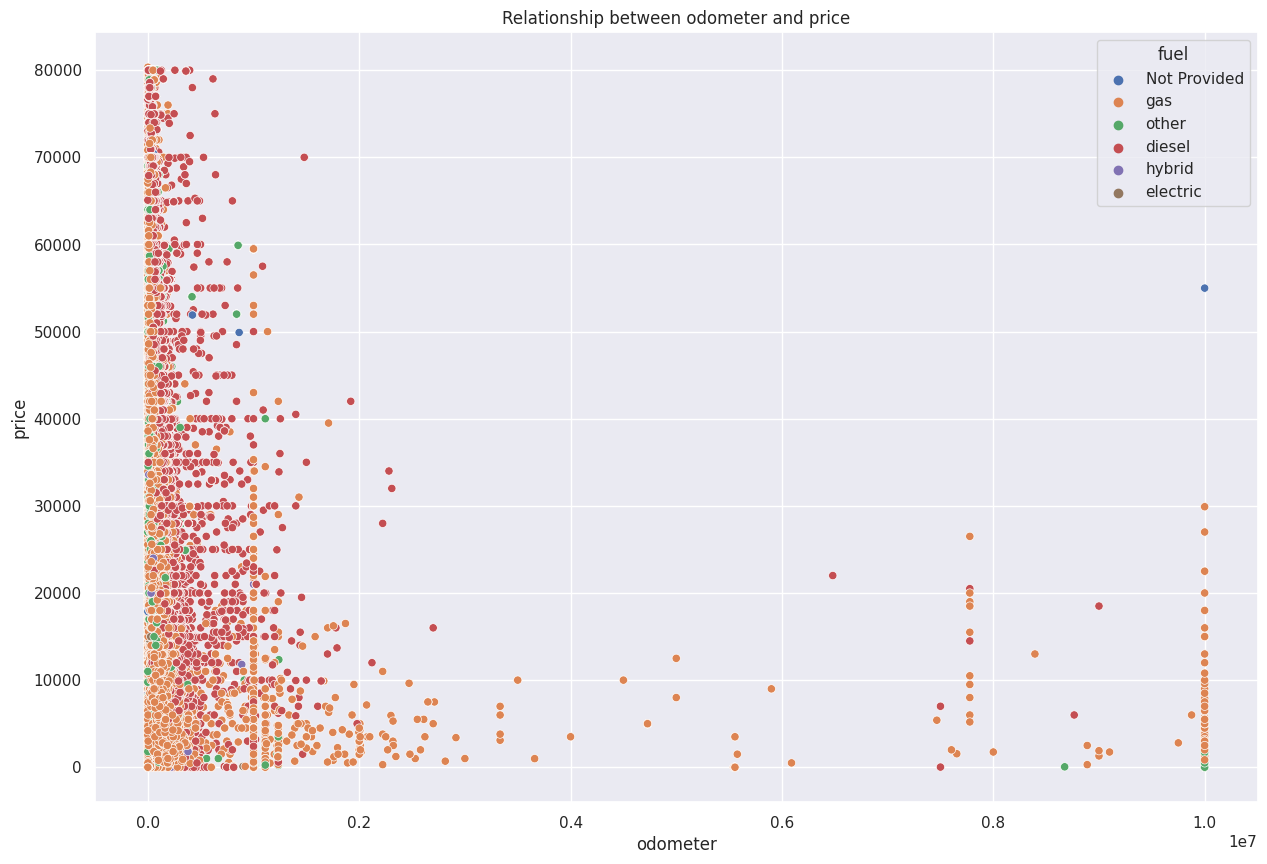

In [106]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='odometer',y='price',hue='fuel',data=df).set(title='Relationship between odometer and price')
plt.show()

### Q2 : What is the price, year and condition distribution?

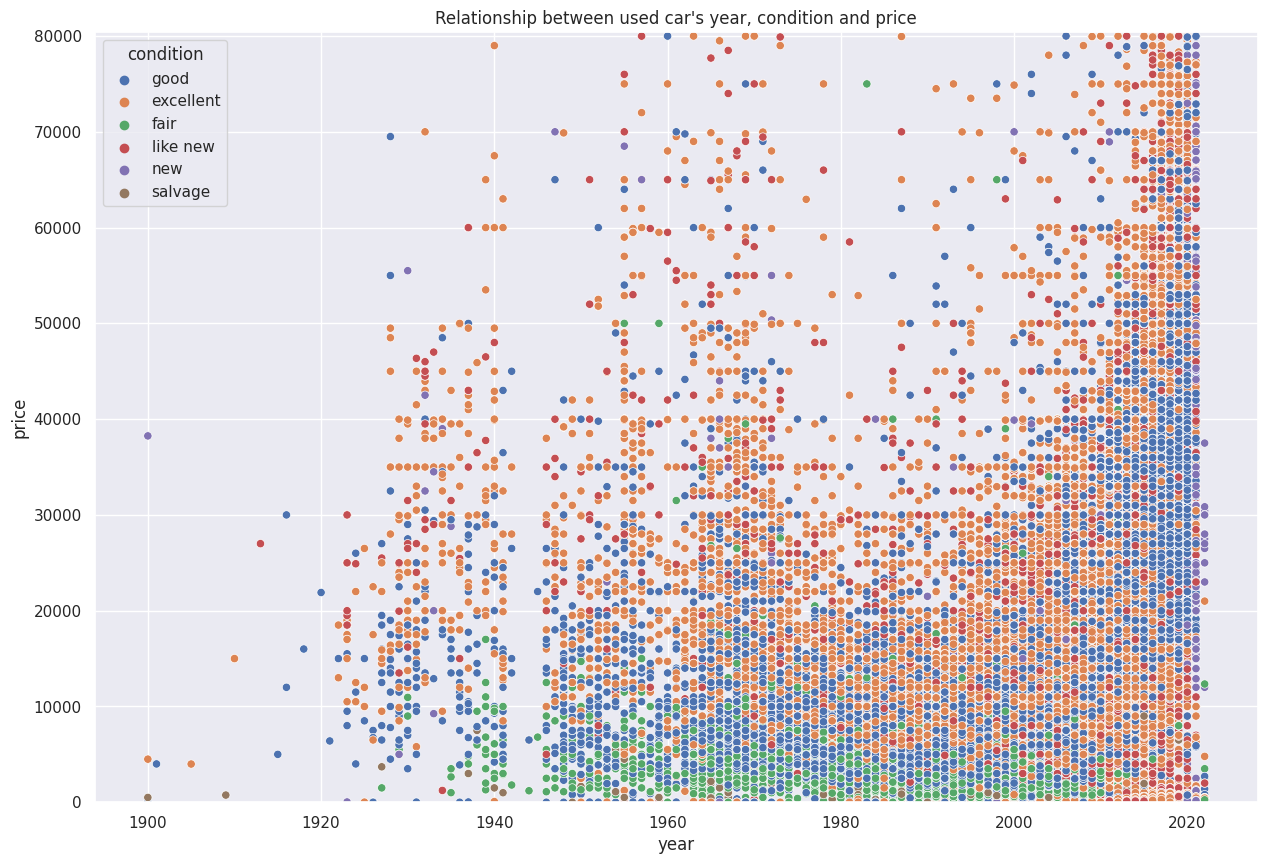

In [107]:
plt.figure(figsize=(15,10))
plt.ylim([0, ymax])
sns.scatterplot(x='year',y='price',hue='condition',data=df.query('condition!="Not Provided"')).set(title="Relationship between used car's year, condition and price")
plt.show()

### Q3 : Calculate descriptive statistics for the price variable.

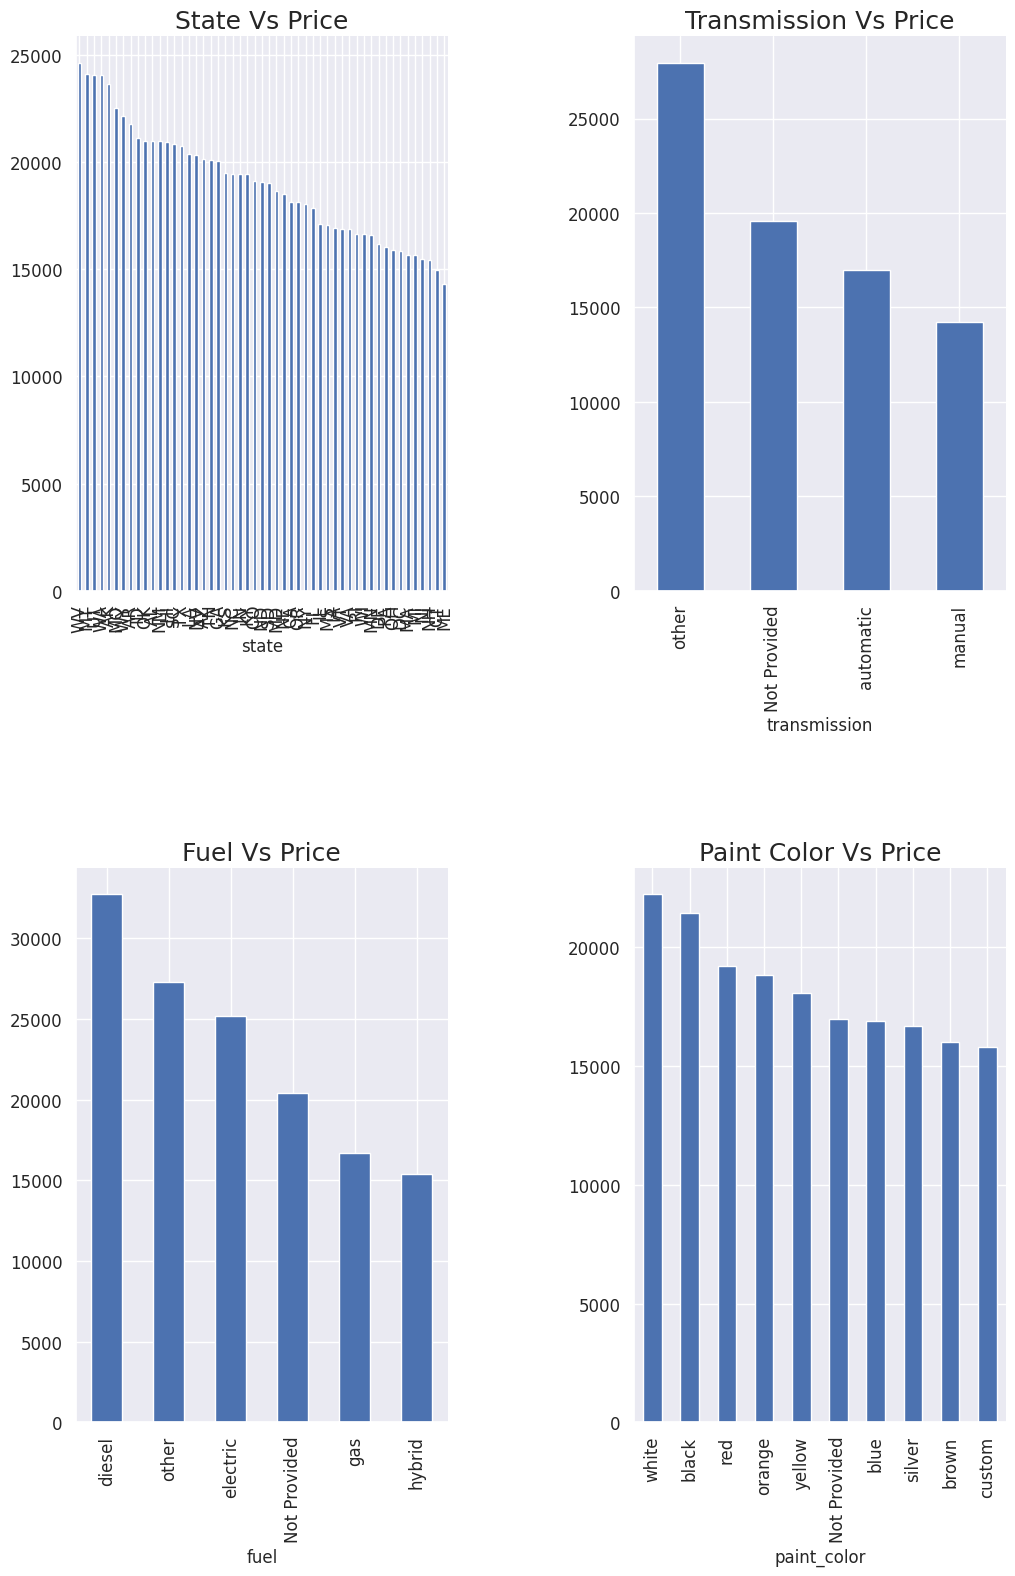

In [123]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(2, 2, figsize=(12, 18))
df.groupby('state')['price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("State Vs Price", fontsize=18)
df.groupby('transmission')['price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
df.groupby('fuel')['price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel Vs Price", fontsize=18)
df.groupby('paint_color')['price'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Paint Color Vs Price", fontsize=18)
plt.subplots_adjust(hspace=.5)
plt.subplots_adjust(wspace=.5)
sns.despine()

### Q4 : What is the distribution between transmission and price?

<Axes: xlabel='transmission', ylabel='price'>

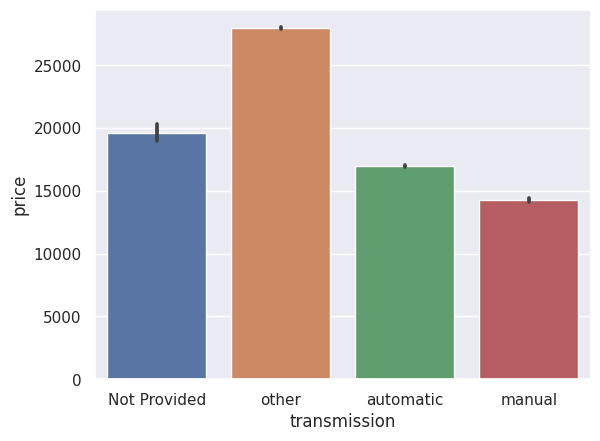

In [118]:
import seaborn as sns

# Use the sns.barplot() function to plot the bar chart
sns.barplot(x='transmission', y='price', data=df)

## First Correlation

<ipython-input-109-d0042528fd4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


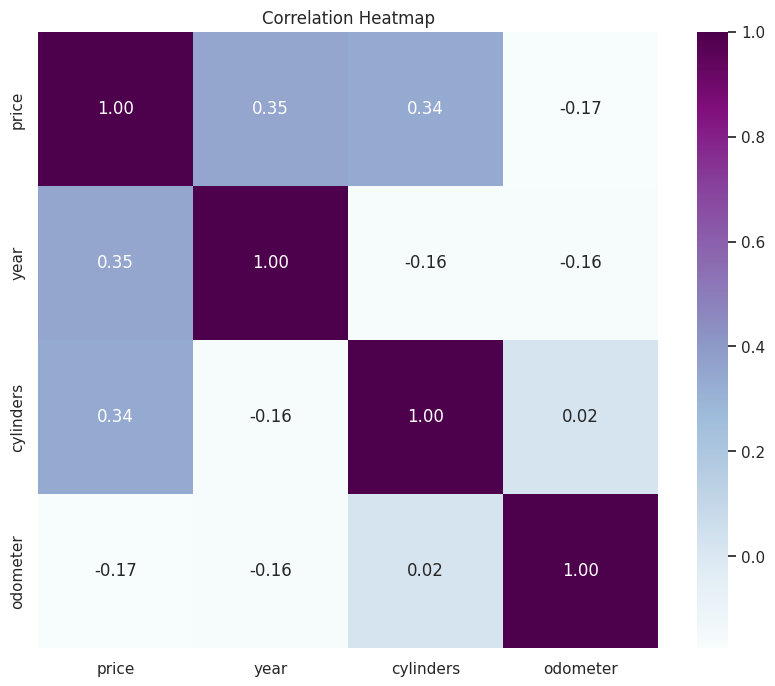

In [109]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Automated Feature Engineering Tools - TPOT

TPOT is an open-source library for performing automated machine learning (AutoML) in Python. It uses a genetic programming algorithm to optimize machine learning pipelines, which consist of data preprocessing, feature engineering, model selection, and hyperparameter tuning steps.

## TPOT Installation

In [124]:
!pip install tpot

In [125]:
import tpot as tp

## Library Import

In [126]:
import pandas as pd
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

##Load Dataset

In [138]:
df2 = df
df2.info()
df2.describe()
df2.isnull().sum()
df2.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392359 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        392359 non-null  object 
 1   price         392359 non-null  int64  
 2   year          392359 non-null  float64
 3   manufacturer  392359 non-null  object 
 4   model         392359 non-null  object 
 5   condition     392359 non-null  object 
 6   cylinders     231549 non-null  float64
 7   fuel          392359 non-null  object 
 8   odometer      390091 non-null  float64
 9   title_status  392359 non-null  object 
 10  transmission  392359 non-null  object 
 11  drive         392359 non-null  object 
 12  size          392359 non-null  object 
 13  type          392359 non-null  object 
 14  paint_color   392359 non-null  object 
 15  state         392359 non-null  object 
 16  posting_date  392359 non-null  object 
dtypes: float64(3), int64(1), object(13)
memory usage

<ipython-input-138-e7b13d64f32d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,price,year,cylinders,odometer
price,1.000000,0.350636,0.335643,-0.174526
year,0.350636,1.000000,-0.164080,-0.163596
cylinders,0.335643,-0.164080,1.000000,0.022370
odometer,-0.174526,-0.163596,0.022370,1.000000


##Prepare Data for TPOT

In [139]:
df2.isna().sum()

region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders       160810
fuel                 0
odometer          2268
title_status         0
transmission         0
drive                0
size                 0
type                 0
paint_color          0
state                0
posting_date         0
dtype: int64

In [140]:
# Drop columns that are not relevant or have too many missing values
df2.drop(['cylinders', 'odometer'], axis=1, inplace=True)

In [147]:
df2.drop(['region', 'title_status', 'drive', 'size', 'type', 'paint_color', 'state'], axis=1, inplace=True)

In [151]:
df2.drop(['posting_date'], axis=1, inplace=True)

In [152]:
# Fill missing values with median or mode
df2['year'].fillna(df2['year'].median(), inplace=True)
df2['manufacturer'].fillna(df2['manufacturer'].mode()[0], inplace=True) # ...

In [ ]:
# Encode categorical variables with one-hot encoding or label encoding
df2 = pd.get_dummies(df2, columns=['manufacturer', 'model', 'condition', 'fuel', 'transmission']) # ...
#Error: Your session crashed after using all available RAM.

##Split Data into X and y

In [154]:
# Split data into X and y
X = df2.drop('price', axis=1)
y = df2['price']

##Split Data into Training and Testing Sets

In [155]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Run and Export

In [156]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_used_car_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -inf


ValueError: ignored